# OneAMZ Kullanıcı Yorumları Web Scraping

# Web Scraping-Web Kazıma

Web Scraping çeşitli web sitelerini taryarak internetten veri toplama işlemidir.Bu veriler işlenir ve belirlenmiş bazı formatlarda saklanır.Veriler ister veri toplama tabanında,ister excel tablosunda,ister json olarak saklarız.İhtiyaçlarımız doğrultusunda kullanırız.
Bir kuruluş veya pek çok kişinin çeşitli nedenlerle internetten veri toplaması gerekebilir.
Bunlar:
Rekabeti analiz etmek,
Belirli pazarlardaki eğilimleri takip etmek,
Hisse senedi fiyatlarını takip etmek,
Ve benzeri birçok alan.

# Veri Kazıma Yöntemleri

Veri kazımanın birçok yöntemi vardır. Parçaların birincisi, gerçek kullanıcılar gibi davranan bir bot oluşturup, web dilinde verinin kazınması, diğer ise web görünümü html içeriğinin indirilip, istenen bölümlerin bölümlerinin kullanılması.Ya da kullanıcı girişi, butonlara tıklamak gibi kullanıcı işlemlerini gerektirmeyen, bir bot oluşturup işlemlerini ona yaptırabiliriz.Bugünkü Python'un BeautifulSoup adlı kütüphanesinden faydalanacağız. BeautifulSoup, HTML veya XML işlemek için birleştirilmiş güçlü ve hızlı bir kütüphanedir.Bu kütüphane ile öncelikle sayfaların html kodlarını indirip, bu kodları parçalayarak verilerini kazıyacağız.
#Kütüphanelerimizi içten içe.
#Veri İşlemleri 
import pandas as pd 
import numpy as np
#Veri Kazıma 
bs4'ten import BeautifulSoup as bs 
import request 
import datetime

In [15]:
pip install PİL


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'PİL'


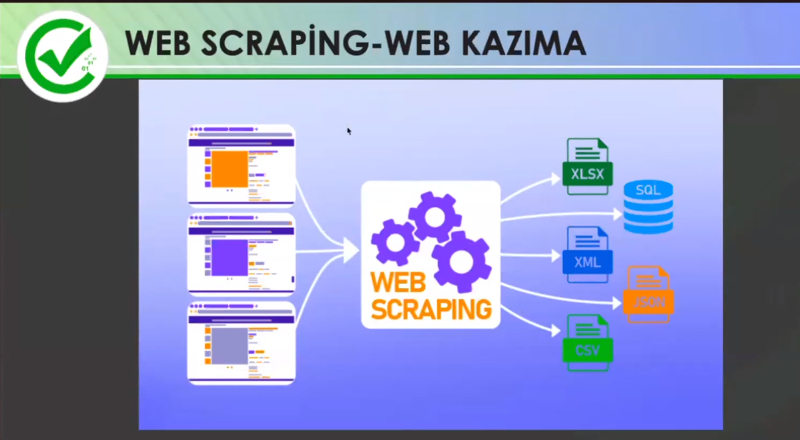

In [17]:
from PIL import Image
img =Image.open("image.png")
img

# Web Scraping Ne işimize Yarar?

Pazarlama ve Satış şirketleri,web kazımayı kullanarak olası satışla ilgili bilgileri alabilir.
Emlak,otel gibi rezervasyonu gibi çeşitli alanlarda kullanılabilir.
Çeşitli E-Ticaret sitelerinden aynı ürünler için farklı fiyat karşılaştırmaları yapılabilir.
#Sonuç olarak her web sitesi farklıdır.Ve hepsinin kendi içinde kendine göre dinamiklerleri vardır.
Bizler web scrapin yaparken bir web sitesi için yazdığımız kodu diğeri için kullanmamız baya zor bir durumdur.
Web sitelerinin sürekli değişiminden kaynaklı bugün yazdığımız kod başka bir zaman diliminde çalışmayabilir.
#Bizim burada Web Scraping'i kullanma amacımız;OneAMZ firmasına yapılan kullanıcı yorumları ile NLP Sentiment(Duygu)Analizi çalışması yapmaktır.

# İmport Basic Libraries(Temel Kütüphanelerin İçe Aktarımı)

In [ ]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [23]:
pip show re

Note: you may need to restart the kernel to use updated packages.


In [24]:
import re
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd


In [25]:
base_url = "https://oneamz.com/kullanici-yorumlari/"
title = []
rating = []
date = []
name = []
desc = []

# 1'den 13'e kadar olan sayfa numaralarını döngü ile ekliyoruz
review_pages = [f"{base_url}?reviews-page={page_num}" for page_num in range(1, 14)]

# Her bir sayfa bağlantısını çekme işlemi
for page_link in review_pages:
    response = requests.get(page_link)
   
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        for i in soup.find_all("div", class_=["glsr-review"]):
            # print(i.h3.text) # title
            title.append(i.h3.text)
            # print(re.search(r'\d+',i.find("span",class_=["screen-reader-text"]).text).group()) # rating
            rating.append(re.search(r'\d+',i.find("span",class_=["screen-reader-text"]).text).group())
            # print(i.find("div",class_=["glsr-review-date"]).span.text) # date
            date.append(i.find("div",class_=["glsr-review-date"]).span.text)
            # print(i.find("div",class_=["glsr-review-content"]).p.text) # desc
            desc.append(i.find("div",class_=["glsr-review-content"]).p.text)
            # print(i.find("div",class_=["glsr-review-author"]).span.text)
            name.append(i.find("div",class_=["glsr-review-author"]).span.text)
    else:
        print(f"Hata: Sayfa alınamadı - {page_link}")
pd.DataFrame({"title":title,"rating":rating,"date":date,"desc":desc,"name":name})



,title,rating,date,desc,name
0,Simge hanıma teşekkürlerimi iletiyorum,5,"Şubat 3, 2023",Simge hanıma teşekkürlerimi iletiyorum. Mağaza...,Hakan
1,destek ve ilgi alakadan dolayı çok teşekkür ed...,5,"Şubat 3, 2023",Ekip olarak göstermiş olduğunuz destek ve ilgi...,Barbaros
2,Simge Hanım'a ve İlkay Hanım'a teşekkür ederim.,5,"Kasım 8, 2022",Simge Hanım’a ve İlkay Hanım’a teşekkür ederim...,M emin akbulut
3,"Ada beye , Simge Hanıma , Ganimet hanıma tüm d...",5,"Kasım 2, 2022","Ada beye , Simge Hanıma , Ganimet hanıma tüm d...",SERAP KARA
4,ONUR BEYE DESTEKLERİNDEN DOLAYI ÇOK TEŞEKKÜR E...,5,"Kasım 2, 2022",ONUR BEYE DESTEKLERİNDEN DOLAYI ÇOK TEŞEKKÜR E...,METİN TEKİN
...,...,...,...,...,...
117,Sorunsuz İşlemler ve Satışlar,5,"Ekim 19, 2021",Kullanmaya başladığımdan bu yana hızlı senkron...,Ada kelci
118,Çok iyi ve Kaliteli!,5,"Ekim 19, 2021",Gerek program olsun gerekte çalışanları olsun ...,Rıza Aykanat
119,Hem Yazılım Hem Hizmet Olarak 1 Numara!,5,"Ekim 19, 2021",Oneamz bir numara her açıdan hem yazılım olara...,BATUHAN
120,7/24 Desteği ile Piyasada TEK!,5,"Ekim 19, 2021",Oneamz university ile 12 magza acilisi yapip s...,Gencer karakaya


In [26]:
df = pd.DataFrame({"title":title,"rating":rating,"date":date,"desc":desc,"name":name})
df.to_excel("rating_NLP.xlsx",index=False)

In [27]:
df

,title,rating,date,desc,name
0,Simge hanıma teşekkürlerimi iletiyorum,5,"Şubat 3, 2023",Simge hanıma teşekkürlerimi iletiyorum. Mağaza...,Hakan
1,destek ve ilgi alakadan dolayı çok teşekkür ed...,5,"Şubat 3, 2023",Ekip olarak göstermiş olduğunuz destek ve ilgi...,Barbaros
2,Simge Hanım'a ve İlkay Hanım'a teşekkür ederim.,5,"Kasım 8, 2022",Simge Hanım’a ve İlkay Hanım’a teşekkür ederim...,M emin akbulut
3,"Ada beye , Simge Hanıma , Ganimet hanıma tüm d...",5,"Kasım 2, 2022","Ada beye , Simge Hanıma , Ganimet hanıma tüm d...",SERAP KARA
4,ONUR BEYE DESTEKLERİNDEN DOLAYI ÇOK TEŞEKKÜR E...,5,"Kasım 2, 2022",ONUR BEYE DESTEKLERİNDEN DOLAYI ÇOK TEŞEKKÜR E...,METİN TEKİN
...,...,...,...,...,...
117,Sorunsuz İşlemler ve Satışlar,5,"Ekim 19, 2021",Kullanmaya başladığımdan bu yana hızlı senkron...,Ada kelci
118,Çok iyi ve Kaliteli!,5,"Ekim 19, 2021",Gerek program olsun gerekte çalışanları olsun ...,Rıza Aykanat
119,Hem Yazılım Hem Hizmet Olarak 1 Numara!,5,"Ekim 19, 2021",Oneamz bir numara her açıdan hem yazılım olara...,BATUHAN
120,7/24 Desteği ile Piyasada TEK!,5,"Ekim 19, 2021",Oneamz university ile 12 magza acilisi yapip s...,Gencer karakaya
